# 优化算法
- 就是用来知道怎么调整参数才能高效、稳定的找到损失函数的最小或者较小值的数学方法（类似多元函数求极值问题的复杂化应用）
## 优化和深度学习
- 在做这个优化的过程中，涉及到前面机器学习的学习里面提到的两个东西就是经验风险（在训练集上的风险，我们不断调整来最小化预期风险的东西）和风险（预期风险，就是我们最终想要达到的最小化的东西），注意在训练的时候，不仅要关注到降低经验风险，还要注意到泛化差距（就是两种风险的差距，就是训练损失和验证损失的差距），这涉及到过拟合和欠拟合的问题。

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import rcParams

def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

def annotate(text, xy, xytext):
    """添加箭头标注"""
    plt.annotate(text, xy=xy, xytext=xytext,
                 arrowprops=dict(arrowstyle='->', linewidth=1))

# 设置中文字体和图形参数
rcParams['font.sans-serif'] = ['Microsoft YaHei', 'Segoe UI Symbol', 'DejaVu Sans']
rcParams['axes.unicode_minus'] = False

# 创建数据
x = torch.arange(0.5, 1.5, 0.01)
f_values = f(x).numpy()
g_values = g(x).numpy()

# 绘制图形
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制两条曲线
ax.plot(x.numpy(), f_values, 'b-', linewidth=2, label='风险 (Risk)')
ax.plot(x.numpy(), g_values, 'r--', linewidth=2, label='经验风险 (Empirical Risk)')

# 设置坐标轴标签
ax.set_xlabel('参数 (Parameter)', fontsize=12)
ax.set_ylabel('损失 (Loss)', fontsize=12)
ax.set_title('风险 vs 经验风险', fontsize=14)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 添加网格
ax.grid(True, linestyle='--', alpha=0.7)

# 添加标注
annotate('经验风险最小值\n(Min of Empirical Risk)',
         (1.0, g_values[np.abs(x.numpy()-1.0).argmin()]),
         (0.5, -1.1))

annotate('风险最小值\n(Min of Risk)',
         (1.1, f_values[np.abs(x.numpy()-1.1).argmin()]),
         (0.95, -0.5))

# 设置坐标轴范围
ax.set_xlim(0.5, 1.5)
ax.set_ylim(-1.4, -0.4)

# 显示图形
plt.tight_layout()
plt.show()

AttributeError: module 'numpy' has no attribute 'ndarray'

### 深度学习中的优化挑战
- 关于解析解和数值解的理解：解析解就是可以直接公式（代数变换、微积分推导）推导出的精确解，可解释性强，数值解就是通过数值计算（迭代算法等）得到的近似解，深度学习中的神经网络损失函数就是用的数值解的方式，因为基本上在神经网络里面数据的维度都超级高，局部极小值一般也有无数个，没办法写出闭合的表达式，计算起来计算量大得不现实。
- 关于鞍点（梯度为零，伪装成极值点）的说法：就是像当前的损失走到了一个类似山脊的地方，左右走都能下降，但是前后走却不怎么变化（一般$\mathrm{SGD}$可能会被困在这附近，带动量的可以冲过鞍点区域，$\mathrm{Adam}$可以更好的逃离鞍点区域）。
- 海森矩阵：二阶导数矩阵，描述各个方向上的曲率，如下图（其中$n$就是多元函数的元数）,可通过海森矩阵的特征值的正负来判断是否是鞍点（目前其实不适用）。

![海森矩阵](../image/HessianMatrix.png)

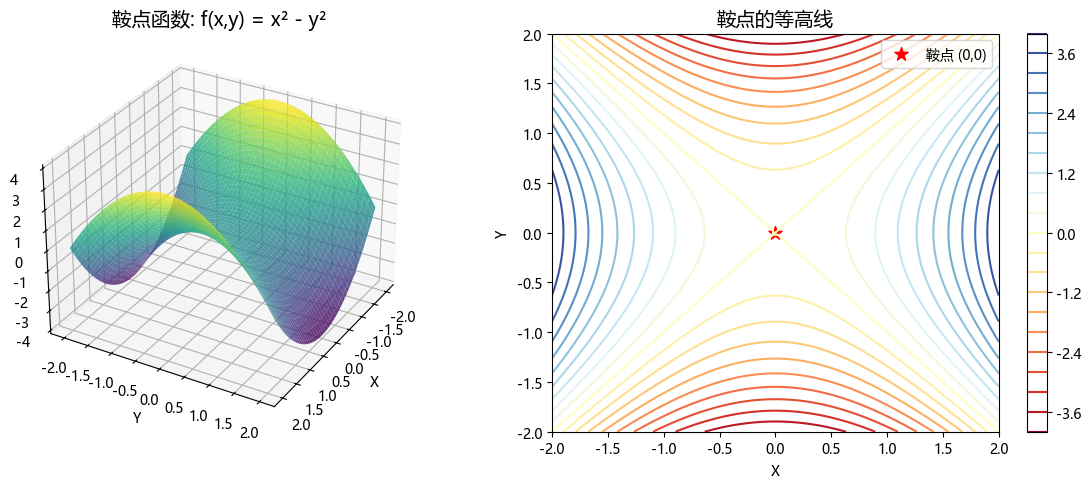

海森矩阵特征值: [ 2. -2.]
特征值一正一负 → 确认是鞍点！


In [13]:
# 定义经典的鞍点函数：f(x,y) = x^2 - y^2
def saddle_function(x, y):
    return x**2 - y**2

# 创建网格
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = saddle_function(X, Y)

# 绘制3D曲面
fig = plt.figure(figsize=(12, 5))

# 3D图
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0)
ax1.set_title('鞍点函数: f(x,y) = x² - y²', fontsize=14)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x,y)')
ax1.view_init(30, 30)

# 等高线图
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, 20, cmap='RdYlBu')
ax2.set_title('鞍点的等高线', fontsize=14)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.colorbar(contour, ax=ax2)

# 标记鞍点(0,0)
ax2.scatter(0, 0, color='red', s=100, marker='*', label='鞍点 (0,0)')
ax2.legend()

plt.tight_layout()
plt.show()

# 计算海森矩阵特征值
H = np.array([[2, 0],  # ∂²f/∂x² = 2
              [0, -2]]) # ∂²f/∂y² = -2
eigenvalues = np.linalg.eigvals(H)
print(f"海森矩阵特征值: {eigenvalues}")
print("特征值一正一负 → 确认是鞍点！")